<a href="https://colab.research.google.com/github/kamsalaswathi/AI-with-tensorflow-projects/blob/main/Develop_Model_Predicting_Icecream_Sales_Using_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROBLEM STATEMENT


*   You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decided to build a simple Artificial Neural Network to solve this problem.


*  Data set:

Input (X): Outside Air Temperature

Output (Y): Overall daily revenue generated in dollars




<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg"
          width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Predict Ice Cream Sales [Source: https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg]
  </td></tr>
</table>

#STEP 1: IMPORT LIBRARIES


In [2]:
# prompt: #IMPORT

import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



#STEP 1 : IMPORT DATASETS

In [3]:
from google.colab import files
data = files.upload()

Saving SalesData.csv to SalesData.csv


In [4]:
sales_df = pd.read_csv('SalesData.csv')

In [5]:
sales_df.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [6]:
sales_df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


#STEP 3: VISUALIZE THE DATA

In [7]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [8]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


<Axes: xlabel='Temperature', ylabel='Revenue'>

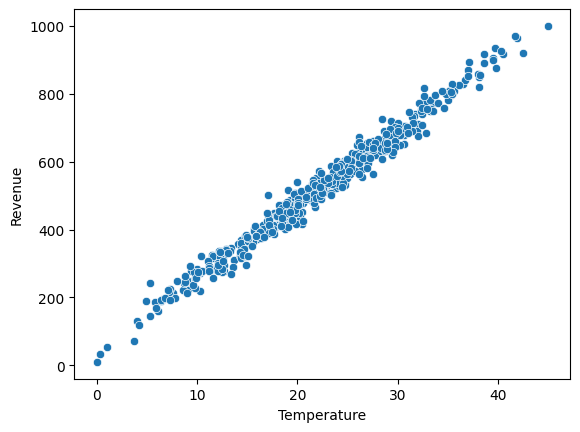

In [9]:
sns.scatterplot(data=sales_df, x=sales_df['Temperature'], y=sales_df['Revenue'])

#STEP 4: CREATE TESTING AND TRAINING DATASETS

In [10]:
X_train = sales_df['Temperature']
Y_train = sales_df['Revenue']

In [11]:
X_train.shape

(500,)

In [12]:
Y_train.shape

(500,)

#STEP 5:  BUILD AND TRAIN THE MODEL

In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

In [15]:
epoch_hist = model.fit(X_train, Y_train, epochs=500)

Epoch 1/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 324777.6875  
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 260204.7031 
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 229739.1406 
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 195675.7500 
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 164335.8125 
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 138540.8281 
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 119180.7188 
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 100958.8672 
Epoch 9/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 79722.2188 
Epoch 10/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 62800.0820 
Epoch 11/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 51440.2578 
Epoch 12/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 43976.9766 
Epoch 13/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 33187.3633 
Epoch 14/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2789

#STEP 6: EVALUATE THE MODEL

In [16]:
epoch_hist.history.keys()

dict_keys(['loss'])

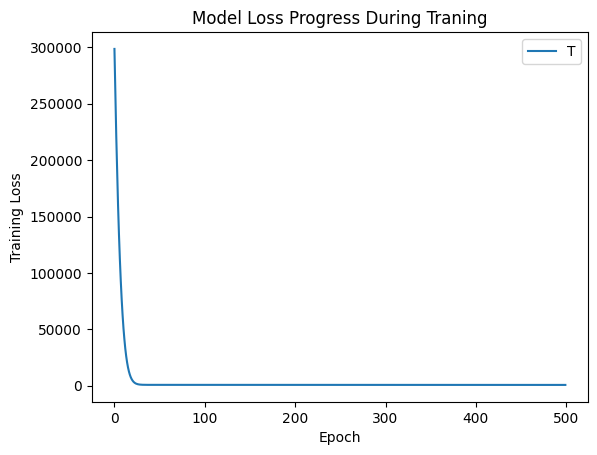

In [17]:
plt.plot(epoch_hist.history['loss'])
plt.title('Model Loss Progress During Traning')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend('Traning Loss')


In [18]:
model.get_weights()

[array([[21.445253]], dtype=float32), array([44.7764], dtype=float32)]

In [19]:
#use the trained model to porform the predictions
temp =15
Revenue = model.predict(np.array([[temp]]))
print("Revenue predictions using trained ANN =", Revenue[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Revenue predictions using trained ANN = 366.4552


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Text(0.5, 1.0, 'Revenue Generated vs Temperature Ice cream Stand ')

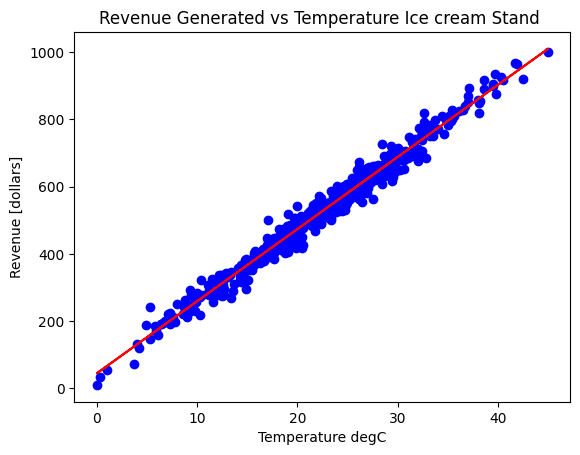

In [20]:
plt.scatter(X_train, Y_train, color='blue')
plt.plot(X_train, model.predict([X_train]), color='red')
plt.xlabel('Temperature degC')
plt.ylabel('Revenue [dollars]')
plt.title("Revenue Generated vs Temperature Ice cream Stand ")



#STEP 6(OPTIONAL) : CONFIRM USING REGRESSION KIT USING SCIKIT LEARN

In [25]:
X_train = X_train.values.reshape(-1, 1)
print(X_train)

[[24.56688442]
 [26.00519115]
 [27.79055388]
 [20.59533505]
 [11.50349764]
 [14.35251388]
 [13.70777988]
 [30.83398474]
 [ 0.97686999]
 [31.66946458]
 [11.45525338]
 [ 3.66466958]
 [18.81182403]
 [13.62450892]
 [39.53990899]
 [18.48314099]
 [25.93537514]
 [42.51528041]
 [29.58948056]
 [21.77594799]
 [25.45783637]
 [15.21456942]
 [22.61931574]
 [16.25872074]
 [23.88172478]
 [18.97830025]
 [15.6614643 ]
 [29.18504465]
 [19.02461092]
 [35.12015142]
 [24.18393726]
 [15.23119012]
 [ 8.79095281]
 [18.23322784]
 [35.62892497]
 [37.05754246]
 [22.28455032]
 [17.51707397]
 [31.7379196 ]
 [17.04973761]
 [23.0034888 ]
 [ 8.75555394]
 [18.77535808]
 [14.10966102]
 [18.63391286]
 [15.67648661]
 [20.94791347]
 [30.6353071 ]
 [20.47359412]
 [31.22898848]
 [ 6.39383463]
 [27.18581031]
 [28.63373276]
 [27.99922248]
 [10.32638937]
 [27.31281141]
 [33.23567229]
 [36.56911506]
 [12.46293731]
 [14.37969698]
 [16.30255473]
 [11.56964367]
 [33.55141872]
 [ 3.98652317]
 [20.51163741]
 [ 6.5425144 ]
 [19.81753

In [26]:
X_train.shape


(500, 1)

In [27]:
Y_train = Y_train.values.reshape(-1,1)


In [28]:
Y_train.shape

(500, 1)

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=False)
regressor.fit(X_train, Y_train)

LinearRegression(fit_intercept=False)

In [30]:
print('Linear model coeff(m)', regressor.coef_)
print('Linear model  coeff(b)', regressor.intercept_)

Linear model coeff(m) [[23.22442357]]
Linear model  coeff(b) 0.0


Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand')

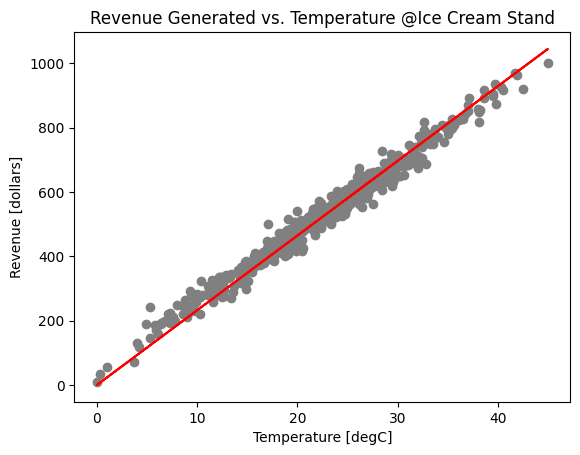

In [31]:
plt.scatter(X_train, Y_train, color='grey')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand')